# Amplitude calculation

### Imports

In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
from pathfinder import Pathfinder

# abs_paths = ['']
# relative_paths = Pathfinder.relative_paths_from_abs(abs_paths)

In [3]:
relative_paths = [['..', '..', '..', '..', '..', '..', '資料科學', 'Allen Downey', 'Think DSP', 'code'],
                  ['..', '..', '..', '..', 'AutoEq'],
                  ['..', 'codes']]

Pathfinder.append_relative_paths(relative_paths)

# dBSPL, dBFS, dBV, V, FS conversions

In [4]:
from drc.measurements import Amplitude


voltage = 2.0
value_FS = 0.5
sensitivity_dBV_at_one_pa = -46
sensitivity_dBFS_at_one_pa = -31.9
gain_dB = 18

# Vrms vs dBSPL =======================
# voltage = 10 ** (-46 / 20)
dBSPL = Amplitude.voltage_to_dBSPL(voltage, sensitivity_dBV_at_one_pa, gain_dB)
print('dBSPL', dBSPL)

vrms = Amplitude.voltage_from_dBSPL(dBSPL, sensitivity_dBV_at_one_pa, gain_dB)
print('vrms', vrms)

assert abs(vrms - voltage) < 1e-7

sensitivity_dBV = Amplitude.get_sensitivity_dBV_by_voltage(voltage, dBSPL, gain_dB)
print('sensitivity_dBV', sensitivity_dBV)
assert abs(sensitivity_dBV - sensitivity_dBV_at_one_pa) < 1e-7

# FS vs dBSPL =======================
dBSPL = Amplitude.FS_to_dBSPL(value_FS, sensitivity_dBFS_at_one_pa, gain_dB)
print('dBSPL', dBSPL)

v_fs = Amplitude.FS_from_dBSPL(dBSPL, sensitivity_dBFS_at_one_pa, gain_dB)
print('v_fs', v_fs)

assert abs(v_fs - value_FS) < 1e-7

sensitivity_dBFS = Amplitude.get_sensitivity_dBFS_by_FS(value_FS, dBSPL, gain_dB)
print('sensitivity_dBFS', sensitivity_dBFS)
assert abs(sensitivity_dBFS - sensitivity_dBFS_at_one_pa) < 1e-7

# dBFS vs dBSPL =======================
dBSPL = Amplitude.dBFS_to_dBSPL(Amplitude._to_dB(value_FS), sensitivity_dBFS_at_one_pa, gain_dB)
print('dBSPL', dBSPL)

dBFS = Amplitude.dBFS_from_dBSPL(dBSPL, sensitivity_dBFS_at_one_pa, gain_dB)
print('dBFS', dBFS)

assert abs(dBFS - Amplitude._to_dB(value_FS)) < 1e-7

sensitivity_dBFS = Amplitude.get_sensitivity_dBFS_by_dBFS(dBFS, dBSPL, gain_dB)
print('sensitivity_dBFS', sensitivity_dBFS)
assert abs(sensitivity_dBFS - sensitivity_dBFS_at_one_pa) < 1e-7

# dBV vs dBSPL =======================
dBSPL = Amplitude.dBV_to_dBSPL(Amplitude._to_dB(voltage), sensitivity_dBV_at_one_pa, gain_dB)
print('dBSPL', dBSPL)

dBV = Amplitude.dBV_from_dBSPL(dBSPL, sensitivity_dBV_at_one_pa, gain_dB)
print('dBV', dBV)

assert abs(dBV - Amplitude._to_dB(voltage)) < 1e-7

sensitivity_dBV = Amplitude.get_sensitivity_dBV_by_dBV(dBV, dBSPL, gain_dB)
print('sensitivity_dBV', sensitivity_dBV)
assert abs(sensitivity_dBV - sensitivity_dBV_at_one_pa) < 1e-7

# dBV vs dBFS ============================
dBFS = Amplitude.dBV_to_dBFS(Amplitude._to_dB(voltage), sensitivity_dBV_at_one_pa, sensitivity_dBFS_at_one_pa, gain_dB)
print('dBFS', dBFS)

dBV = Amplitude.dBFS_to_dBV(dBFS, sensitivity_dBFS_at_one_pa, sensitivity_dBV_at_one_pa, gain_dB)
print('dBV', dBV)

assert abs(dBV - Amplitude._to_dB(voltage)) < 1e-7

# voltage vs FS ============================
vfs = Amplitude.voltage_to_FS(voltage, sensitivity_dBV_at_one_pa, sensitivity_dBFS_at_one_pa, gain_dB)
print('vfs', vfs)

vrms = Amplitude.FS_to_voltage(vfs, sensitivity_dBFS_at_one_pa, sensitivity_dBV_at_one_pa, gain_dB)
print('vrms', vrms)

assert abs(vrms - voltage) < 1e-7


dBSPL 128.0
vrms 2.0
sensitivity_dBV -46.0
dBSPL 101.85880017344076
v_fs 0.5000000000000001
sensitivity_dBFS -31.900000000000006
dBSPL 101.85880017344076
dBFS -6.0205999132796215
sensitivity_dBFS -31.9
dBSPL 128.0
dBV 6.020599913279624
sensitivity_dBV -46.0
dBFS 20.120599913279623
dBV 6.020599913279624
vfs 10.139814165494085
vrms 2.0


# Calculate Sensitivity
### We can calculate sensitivity if dBSPL, dBFS and gain are known, same with dBSPL-dBV

In [5]:
gain_dB = 18

dBSPL = 92.6862
dBFS = -29.117
dBV = -29.117

sensitivity_dBFS = Amplitude.get_sensitivity_dBFS_by_dBFS(dBFS, dBSPL, gain_dB)
sensitivity_dBV = Amplitude.get_sensitivity_dBV_by_dBV(dBV, dBSPL, gain_dB, value_ref = 1)

sensitivity_dBFS, sensitivity_dBV

(-45.82379991327962, -45.82379991327962)

# Calculate Gain
### We can calculate gain if dBSPL, dBFS, sensitivity are known, same with dBSPL-dBV

In [6]:

gain_dBFS = Amplitude.get_gain_dB_by_dBFS(dBFS, sensitivity_dBFS, dBSPL)
gain_dBV = Amplitude.get_gain_dB_by_dBV(dBV, dBSPL, sensitivity_dBV, value_ref = 1)

gain_dBFS, gain_dBV

(17.999999999999993, 18.0)

# Inferenc of sensitivity on SPL
With the same dBFS, the more sensitive the microphone is, the lower the SPL is.

28.0

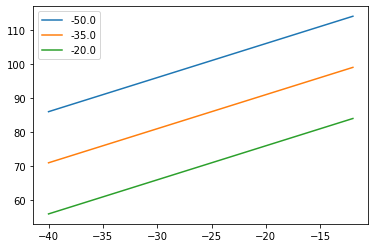

In [7]:
sensitivities = np.linspace(-50, -20, 3)
dBFSs = np.linspace(-40, -12, 100)
dBSPLs = np.array(list(Amplitude.dBFS_to_dBSPL(dBFSs, sens, gain_dB) for sens in sensitivities))

for i in range(len(sensitivities)):
    plt.plot(dBFSs, dBSPLs[i], label = sensitivities[i])
    
plt.legend()
max(dBSPLs[0]) - min(dBSPLs[0])

# Inferenc of gain on SPL
With the same dBFS, the higher gain of the microphone is, the lower the SPL is.

28.0

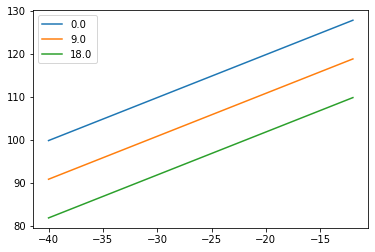

In [8]:
gains = np.linspace(0, 18, 3)
dBFSs = np.linspace(-40, -12, 100)
dBSPLs = np.array(list(Amplitude.dBFS_to_dBSPL(dBFSs, sensitivity_dBFS, gain) for gain in gains))

for i in range(len(gains)):
    plt.plot(dBFSs, dBSPLs[i], label = gains[i])
    
plt.legend()
max(dBSPLs[0]) - min(dBSPLs[0])

# The interaction of gain and sensitivity
With the different dBFSs and dBSPLs measured with the same microphone, 
the higher the gain means the lower the sensitivity is, no matter what level the SPL is.

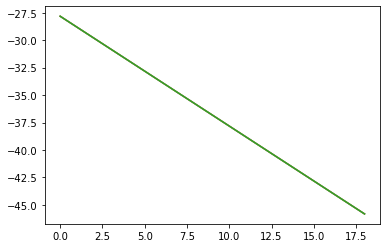

In [9]:
sensitivity_dBFS, gain_dB = -45.82379991327962, 18

dBFSs = np.linspace(-40, -12, 3) 
dBSPLs = Amplitude.dBFS_to_dBSPL(dBFSs, sensitivity_dBFS, gain_dB) 

gains = np.linspace(0, 18, 100)

for fs, spl in zip(dBFSs, dBSPLs):
    sensitivity_dBFSs = [Amplitude.get_sensitivity_dBFS_by_dBFS(fs, spl, gain_dB) for gain_dB in gains]
    # sensitivity_dBFS, sensitivity_dBV
    # (-45.82379991327962, -45.82379991327962)

    plt.plot(gains, sensitivity_dBFSs);

# UMIK-1
https://www.hometheatershack.com/threads/understanding-spl-offset-umik-1.134857/

In [10]:
from drc.measurements.frequency.calibrations.miniDSP import UMIK1

In [11]:
umik = UMIK1()

# fn = 'UMIK-1 cal file 7103946.txt'
fn = 'UMIK-1 cal file 7103946_90deg.txt'

umik.load(file_name = fn, field_sep = None, n_header_lines = 2, line_sep = '\n')

In [12]:
umik.serial_no  

'7103946'

In [13]:
umik.sensitivity_factor_dBFS 

-0.667

In [14]:
umik.sensitivity_dBFS

-48.68759991327963

In [15]:
umik.gain_dB 

18.0

## Sensitivity Factor

In [16]:
UMIK1.get_sensitivity_factor_dBFS(umik.sensitivity_dBFS, gain_dB = umik.gain_dB)

-0.6669999999999994

In [17]:
Amplitude.get_sensitivity_dBFS_by_dBFS(dBFS = umik.sensitivity_factor_dBFS ,
                                       dBSPL = 100,
                                       gain_dB = 18 + 24)

-48.68759991327963

In [18]:
Amplitude.get_sensitivity_dBFS_by_dBFS(dBFS = umik.sensitivity_factor_dBFS ,
                                       dBSPL = 94,
                                       gain_dB = 18 + 24)

-42.68759991327962

```
The sens factor figure is the rms input level from the mic in dBFS 
when driven by a 94 dB calibrator with the mic input volume set to maximum. 

Note for that purpose the dBFS reading is based on a full scale sine being -3.01 dBFS, not 0 dBFS. The actual OS input volume gain/attenuation needs to be accounted for when converting mic rms dBFS levels to SPL.
```